In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

## K-Means Clustering

In [2]:
#Prepare Dataset
x = [1,1.5,3,5,3.5,4.5,3.5]
y = [1,2,4,7,5,5,4.5]

points = [[X,Y] for X,Y in zip(x,y)]
points

[[1, 1], [1.5, 2], [3, 4], [5, 7], [3.5, 5], [4.5, 5], [3.5, 4.5]]

In [3]:
# fit kmeans object to data
kmeans = KMeans(n_clusters=2)
kmeans.fit(points) 

print("Cluster Centers:")
print(kmeans.cluster_centers_)
clustered_values= kmeans.fit_predict(points)

print("Cluster Assignment:")
print(clustered_values) 

Cluster Centers:
[[1.25 1.5 ]
 [3.9  5.1 ]]
Cluster Assignment:
[1 1 0 0 0 0 0]


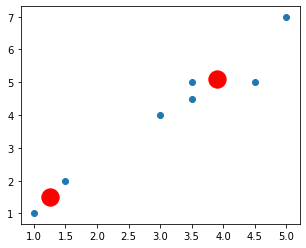

In [4]:
plt.figure(figsize=(5,4))
plt.scatter(x,y)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

## Agglomerative Hierarchical Clustering

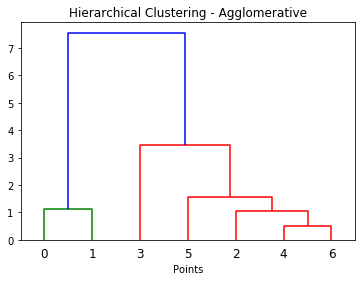

In [5]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(points)
plt.title('Hierarchical Clustering - Agglomerative')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Points")
plt.show()